# Data Science Project Spring 2023

## 200+ Financial Indicators of US stocks (2014-2018)

### Yiwei Gong, Janice Herman, Alexander  Morawietz and Selina Waber

University of Zurich, Spring 2023

## Importing Packages

In [1]:
import os 
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas_datareader import data


from sklearn.model_selection import train_test_split

## Loading the Data Set


We used the data set from Nicolas Carbone from the webpage [kaggle](https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018). Each dataset contains over 200 financial indicators, that are found in the [10-K filings](https://www.investopedia.com/terms/1/10-k.asp#:~:text=Key%20Takeaways-,A%2010%2DK%20is%20a%20comprehensive%20report%20filed%20annually%20by,detailed%20than%20the%20annual%20report.) of publicly traded companies from the US between the years 2014 - 2018.

In [2]:
project_directory = sys.path[0] ## get path of project directory
data_directory = os.path.join(project_directory, 'data')

years = [2014, 2015, 2016, 2017, 2018]

## Loading the yearly dataset into the array dfs
dfs = []
for year in years:
    df = pd.read_csv(os.path.join(data_directory, f'{year}_Financial_Data.csv'), sep=',')
    df['year'] = np.full(df.shape[0], str(year)) ## append column with the year respecitvely
    df['PRICE VAR [%]'] = df[f'{year +1} PRICE VAR [%]'] ## Adding variable of the same name for all df, e.g. '2016 PRICE VAR [%]' renamed to 'PRICE VAR [%]'
    df = df.drop(columns=[f'{year +1} PRICE VAR [%]']) # dropp year-specific variable name
    df.columns.values[0] = 'Stock Name' # name the first variable 
    dfs.append(df)
    
    
df = pd.concat(dfs, ignore_index=True) ## concat the diffrent dataframes
df.head()

,Stock Name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,year,PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-9.323276
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,0,2014,-25.512193
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,33.118297
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,1,2014,2.752291
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,1,2014,12.897715


## Some Explanation of Variables:

### Adding  `year` as a cathegorical variable

We added a column named `year` which contains the respecitve year.



### Handling the variable `Price VAR [%]`

The last column, `PRICE VAR [%]`, lists the percent price variation of each stock for the year. For example, if we consider the dataset 2015_Financial_Data.csv, we will have:

- 200+ financial indicators for the year 2015;
- percent price variation for the year 2016 (meaning from the first trading day on Jan 2016 to the last trading day on Dec 2016).

We renamed all the variables with the specific year in it, e.g.  `2016 PRICE VAR [%]` to `PRICE VAR [%]`. We dropped the old ones.Now we just have one variable `PRICE VAR [%]`. 


### The variable `class`

class lists a binary classification for each stock, where

- for each stock, if the PRICE VAR [%] value is positive, class = 1. From a trading perspective, the 1 identifies those stocks that an hypothetical trader should BUY at the start of the year and sell at the end of the year for a profit.
- for each stock, if the PRICE VAR [%] value is negative, class = 0. From a trading perspective, the 0 identifies those stocks that an hypothetical trader should NOT BUY, since their value will decrease, meaning a loss of capital.


The columns `PRICE VAR [%]` and `class` make possible to use the datasets for both classification and regression tasks:

- If the user wishes to train a machine learning model so that it learns to classify those stocks that in buy-worthy and not buy-worthy, it is possible to get the targets from the class column;
- If the user wishes to train a machine learning model so that it learns to predict the future value of a stock, it is possible to get the targets from the PRICE VAR [%] column.


### The variable  `Stock Name`

We named the first variable `Stock Name`since it has not been named in the original dataset.



## First Description of the Data

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 226 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    Stock Name                                  object 
 1    Revenue                                     float64
 2    Revenue Growth                              float64
 3    Cost of Revenue                             float64
 4    Gross Profit                                float64
 5    R&D Expenses                                float64
 6    SG&A Expense                                float64
 7    Operating Expenses                          float64
 8    Operating Income                            float64
 9    Interest Expense                            float64
 10   Earnings before Tax                         float64
 11   Income Tax Expense                          float64
 12   Net Income - Non-Controlling int            float64
 13   Net Income - D

## Numerical and Catgorical Features/Variables

We are converting `Class`to a cathegorical variable.

In [4]:
df['Class'] = df.Class.astype('object') ## object or catheogry?? whats the difference???

numCols = df.select_dtypes(exclude='object').columns
print(f"There are {len(numCols)} numerical features:\n")

catCols = df.select_dtypes(include='object').columns
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 222 numerical features:

There are 4 categorical features:
 Index(['Stock Name', 'Sector', 'Class', 'year'], dtype='object')


## Any Duplicates? 

No, there are no duplicates for rows but there are 20 duplicates for columns/ 10 each. Not same variable name but same data!

In [5]:
print(f'Duplicates in Rows:', True in list(df.duplicated()))


Duplicates in Rows: False


In [6]:
print(f'Duplicates in Columns:', True in list(df.T.duplicated().T))
print("Show the Duplicates:")
print(df.T[df.T.duplicated(keep=False)].T)

Duplicates in Columns: True
Show the Duplicates:
      ebitperRevenue ebtperEBIT  niperEBT returnOnAssets  \
0           0.204339   0.953364  0.803298         0.5765   
1           0.050221   0.935218  0.774438         0.0403   
2           0.027578   0.836712  0.669163         0.1011   
3           0.026436   0.370798  0.996787         0.0668   
4           0.168072   0.899538  0.673782         0.6265   
...              ...        ...       ...            ...   
22072            NaN        NaN       NaN            NaN   
22073     -16.492806        NaN       NaN        -0.8423   
22074       0.175924   0.871662  0.833869         0.2228   
22075            NaN        NaN       NaN        -7.5619   
22076       -0.64541        NaN       NaN        -0.2021   

      returnOnCapitalEmployed  nIperEBT eBTperEBIT eBITperRevenue  \
0                      0.0753  0.803298   0.953364       0.204339   
1                         0.0  0.774438   0.935218       0.050221   
2                      

Our Duplicates are the following pairs:

- `ebitperRevenue` and `eBITperRevenu`
- `ebtperEBIT` and `eBTperEBIT`
- `niperEBT` and `nIperEBT`
- `returnOnAssets` and `Return on Tangible Assets`
- `returnOnCapitalEmployed` and `ROIC`
- `payablesTurnover` and `Payables Turnover`
- `inventoryTurnover` and `Inventory Turnover`
- `debtRatio` and `Debt to Assets`
- `debtEquityRatio` and `Debt to Equity`
- `cashFlowToDebtRatio` and `cashFlowCoverageRatios`

We will remove the first occurence of the duplicates respectively.

In [7]:
shape_old=df.shape

## HUGHE PROBLEM --> df.drop_duplicates() transforms all variables to the datatype 'object'!
#I don't know why it does that!
# So i will remove the manually!!!

#df= df.T.drop_duplicates().T # remove duplicates!

df= df.drop(columns=['eBITperRevenue', 'eBTperEBIT', 'nIperEBT', 'Return on Tangible Assets', 
                     'ROIC', 'Payables Turnover', 'Inventory Turnover', 'Debt to Assets', 'Debt to Equity', 
                     'cashFlowCoverageRatios'])

print(f' Shape with duplicates:', shape_old) 
print(f' Shape after removal of duplicates:', df.shape) 


#print(df.info(verbose=True)) ok good, sill folat64 objects


 Shape with duplicates: (22077, 226)
 Shape after removal of duplicates: (22077, 216)


## Variation 
There is something seriously wrong with the variable `operatingProfitMargin`. It has a Standard Deviation of 0, which cant be! So we dropp it.

In [8]:
df.std(axis=0, skipna=True, numeric_only=True)

no_std= [ std for std in df.std( axis=0, skipna=True, numeric_only=True) if std <= 0.15]
print(no_std)



#x = df.std( axis = 0, skipna = True, numeric_only = True)
#[(index, x[index]) for index in x.index.values if x[index] > 0]

### TO DOOO!!!!!!!!!!!!!!!!!

df= df.drop(columns= ['operatingProfitMargin'])


[0.0, 0.143164398647876, 0.11531807643416797, 0.11101356048941195, 0.12655569570851052]


Furthermore, there are two variables (operatingCycle and cashConversionCycle) which have missing values in more than 99% of the time. These two columns are also dropped.

In [9]:
most_nan_columns = df.isnull().mean(axis = 0)

print("Variables with maximal missing rate:")
print(most_nan_columns[most_nan_columns > 0.5])
df = df.drop(columns = ["operatingCycle", "cashConversionCycle"])

Variables with maximal missing rate:
operatingCycle         0.999139
cashConversionCycle    0.999139
dtype: float64


## Correlation of the variables

Although we removed all doublicates there are still many variables that are highly correlated. We consider variables with correlations larger than 0.98 as doublicates and remove them.

In [10]:
#check_corr contains the predictor variables which have to be checked for high correlations.
check_corr = df.drop(labels=["Class", "Stock Name", "Sector", "year", "PRICE VAR [%]"], axis = 1)

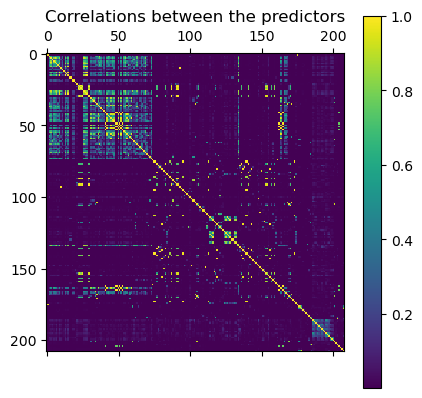

In [11]:
plt.matshow(check_corr.corr().abs())
plt.title("Correlations between the predictors")
plt.colorbar()

In [12]:
abs_corr = check_corr.corr().abs()
for i in range(len(abs_corr)):
    abs_corr.iloc[i, i] = 0
    
    
abs_corr_unstack = abs_corr.unstack()
print("Variable pairs with maximal correlation")
print(abs_corr_unstack.sort_values(kind="quicksort")[-50:])

Variable pairs with maximal correlation
Tax Liabilities                 Total non-current liabilities     1.0
Total non-current liabilities   Tax Liabilities                   1.0
Total non-current assets        Total non-current liabilities     1.0
Total non-current liabilities   Total non-current assets          1.0
Deferred revenue                Total non-current liabilities     1.0
Total non-current liabilities   Deferred revenue                  1.0
interestCoverage                Interest Coverage                 1.0
Interest Coverage               interestCoverage                  1.0
Tax Liabilities                 Other comprehensive income        1.0
Other comprehensive income      Tax Liabilities                   1.0
Total non-current assets        Other comprehensive income        1.0
Other comprehensive income      Total non-current assets          1.0
                                Deferred revenue                  1.0
Deferred revenue                Other comprehensiv

In [13]:
#A variables is removed if the correlation with another variable is higher than 0.95.

columns_to_drop = []
columns_to_remain = []

for pair in abs_corr_unstack.index.values:
    if abs_corr_unstack[pair] > 0.95:
        if pair[0] not in columns_to_remain and pair[1] not in columns_to_remain:
                columns_to_remain.append(pair[0])
                if pair[1] not in columns_to_drop:
                    columns_to_drop.append(pair[1])
        elif pair[0] in columns_to_remain:
            if pair[1] not in columns_to_drop:
                columns_to_drop.append(pair[1])
        elif pair[1] in columns_to_remain:
            if pair[0] not in columns_to_drop:
                columns_to_drop.append(pair[0])

df = df.drop(columns=columns_to_drop)

In [14]:
print(f"{len(columns_to_drop)} variables were removed as dublicates.")

58 variables were removed as dublicates.


## Class Balance?

The Variable `Class`is not balanced. We have to keep that in mind for train and test split. 

In [15]:
# Distribution of target Variable
#sns.barplot(x = '0', y = '1', data = df['Class'].value_counts())
#plt.show()

#That won't work??? WHY????

## Outliers Detection for `PRICE VAR[%]`

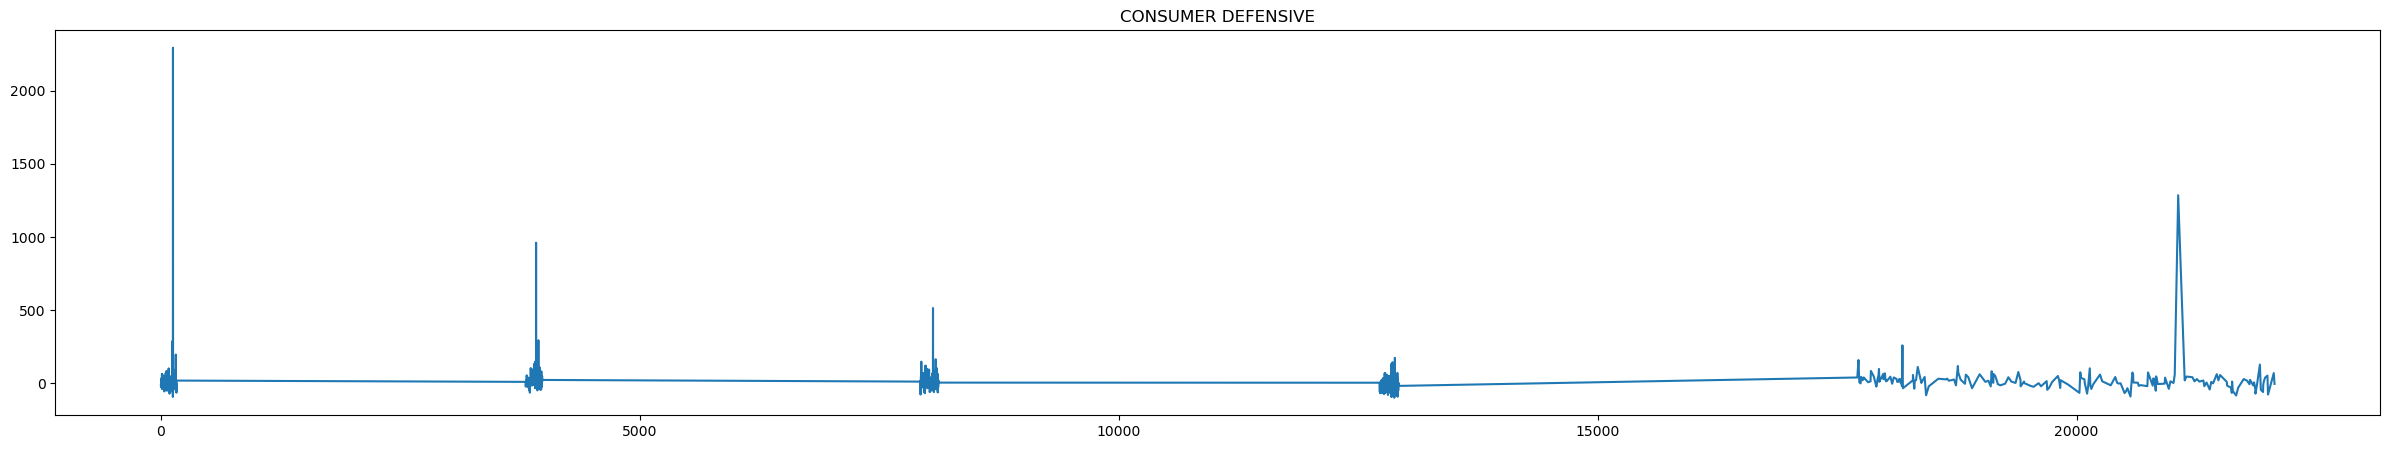

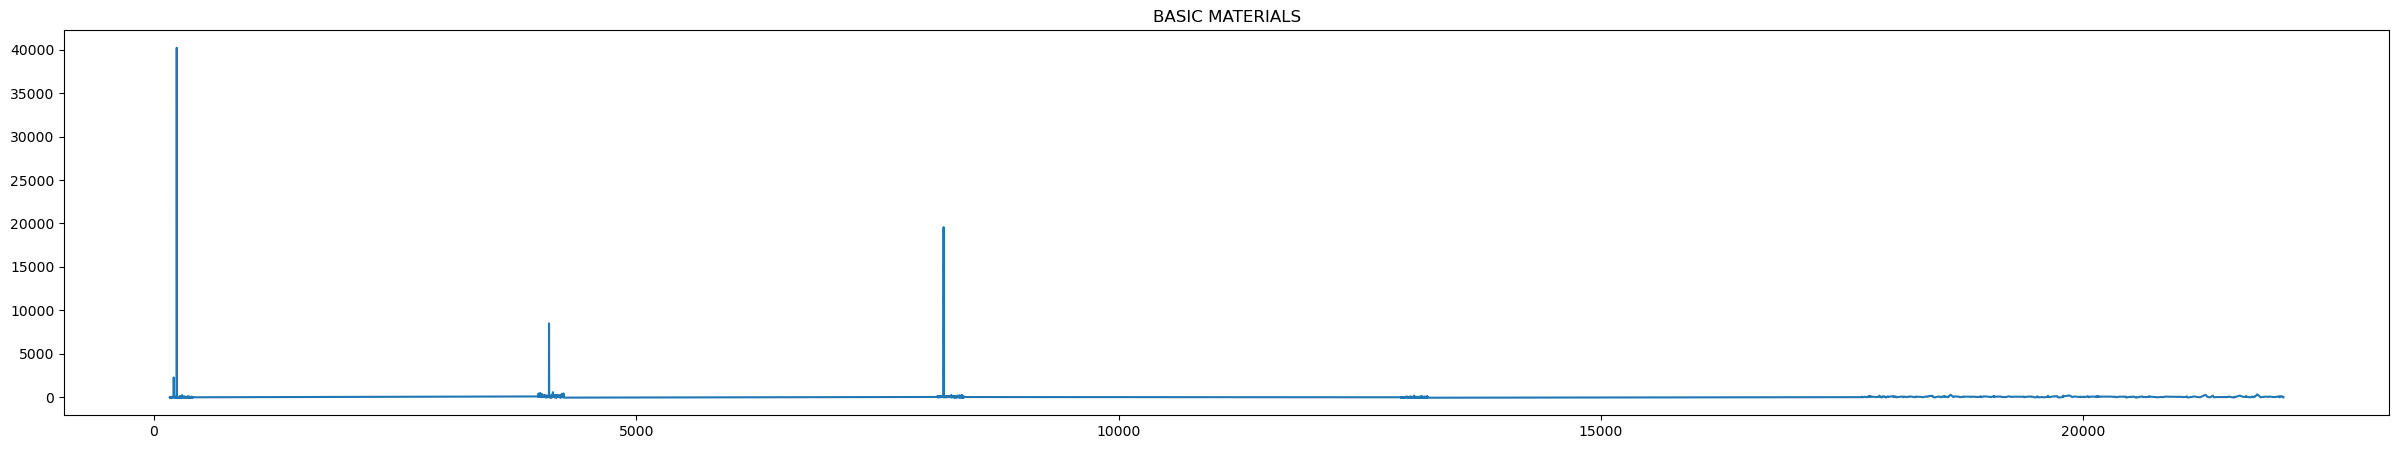

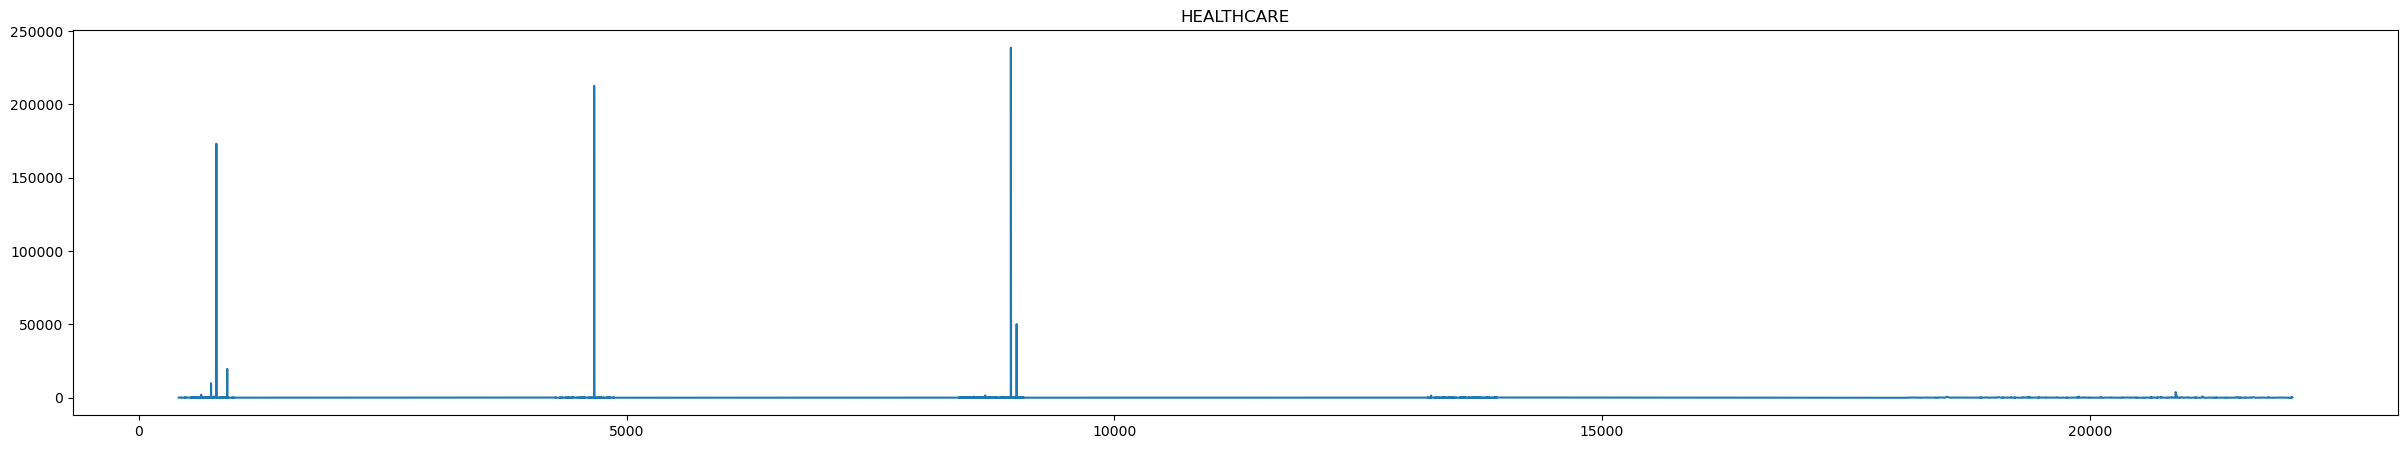

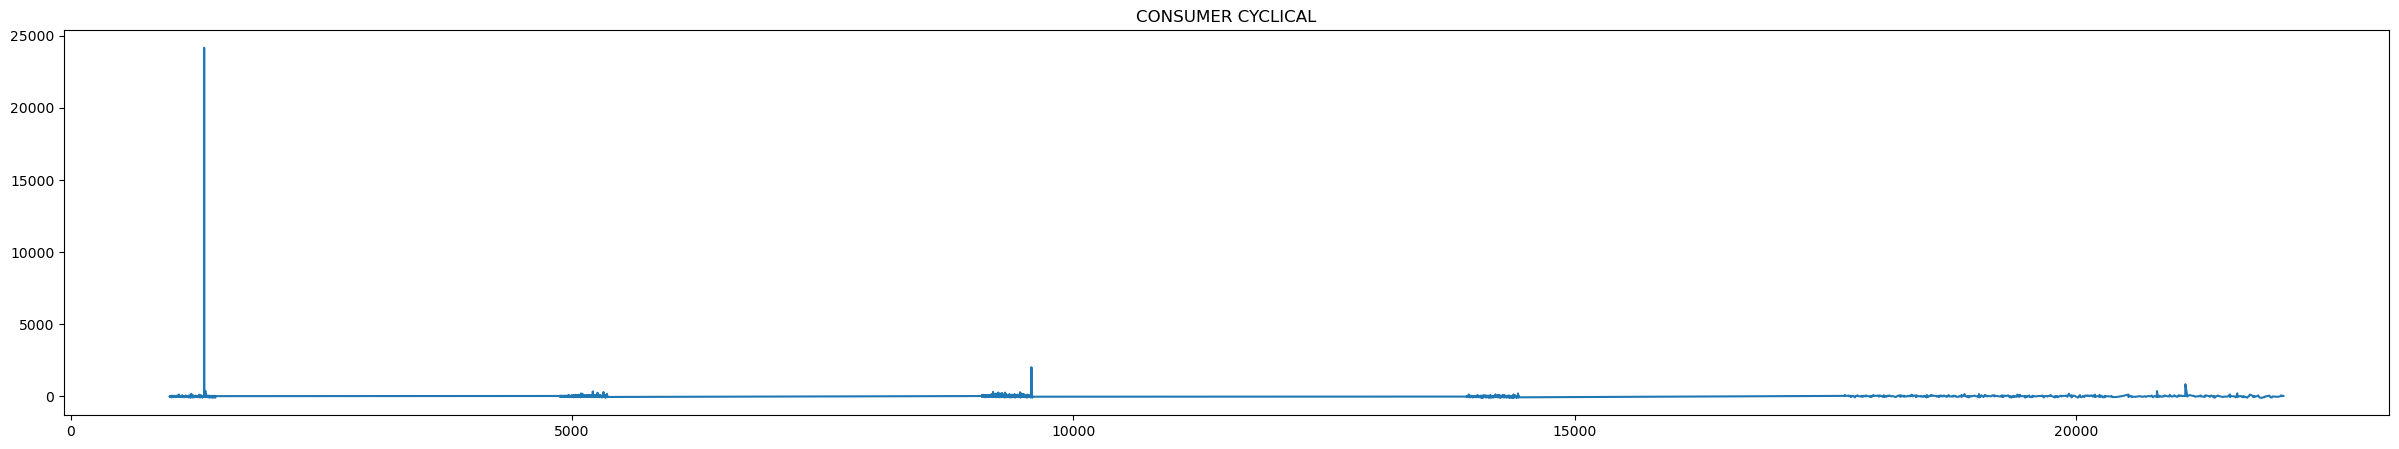

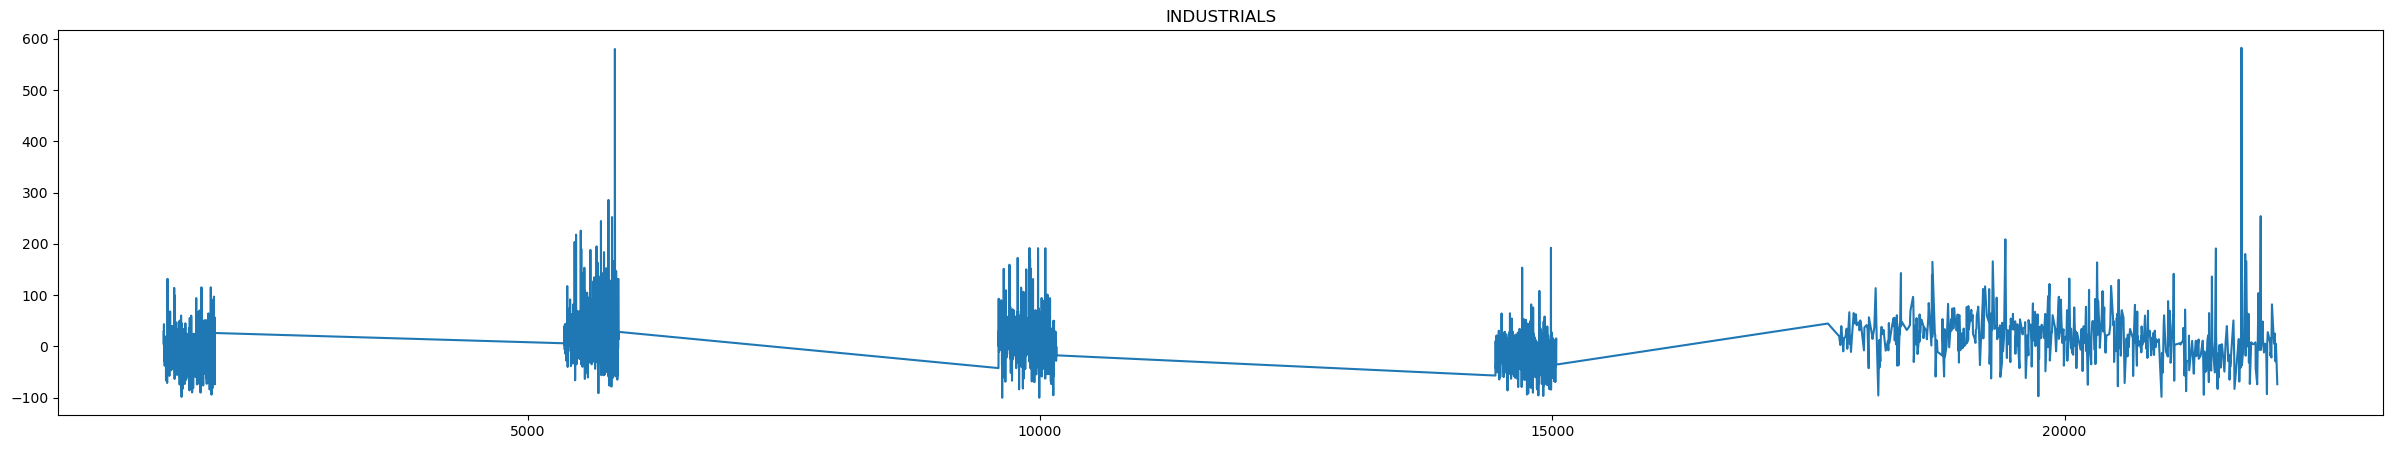

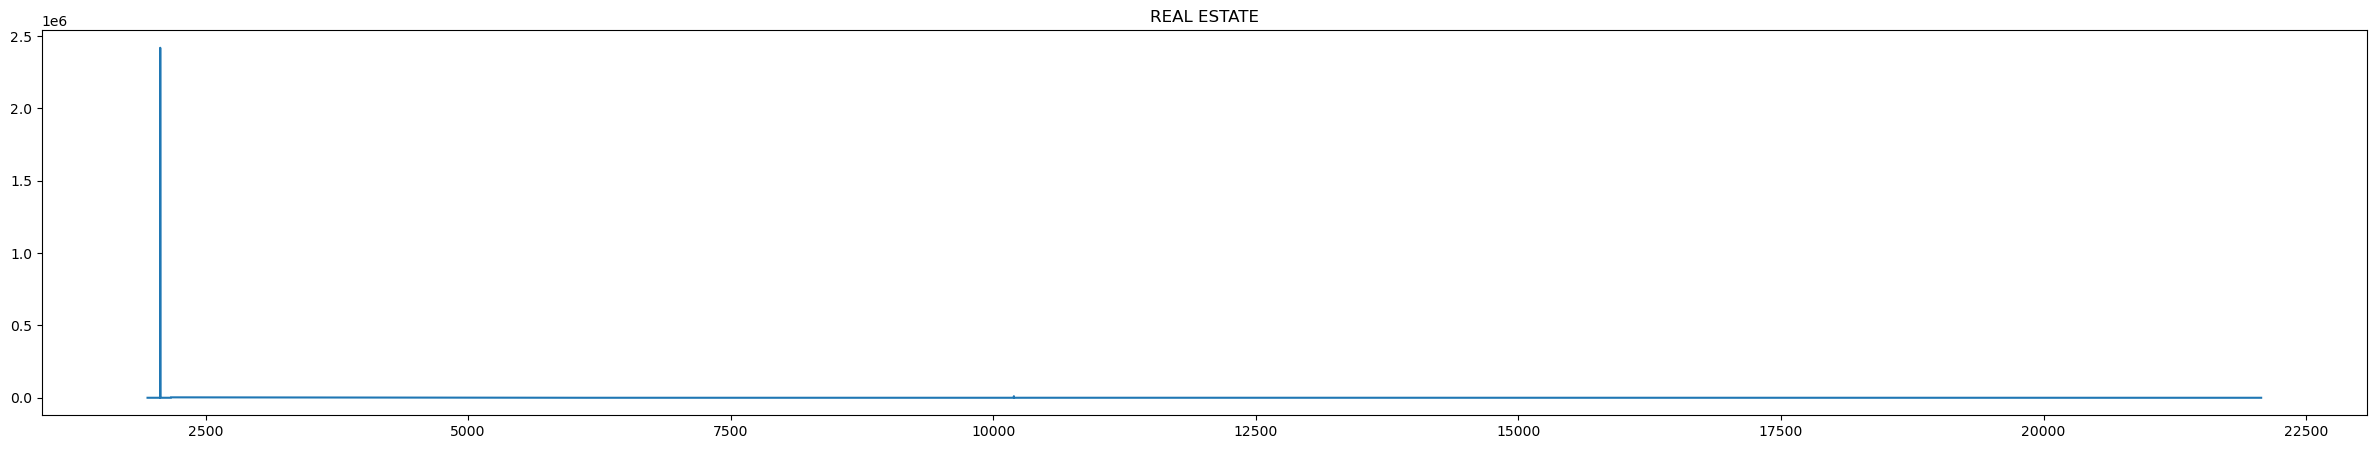

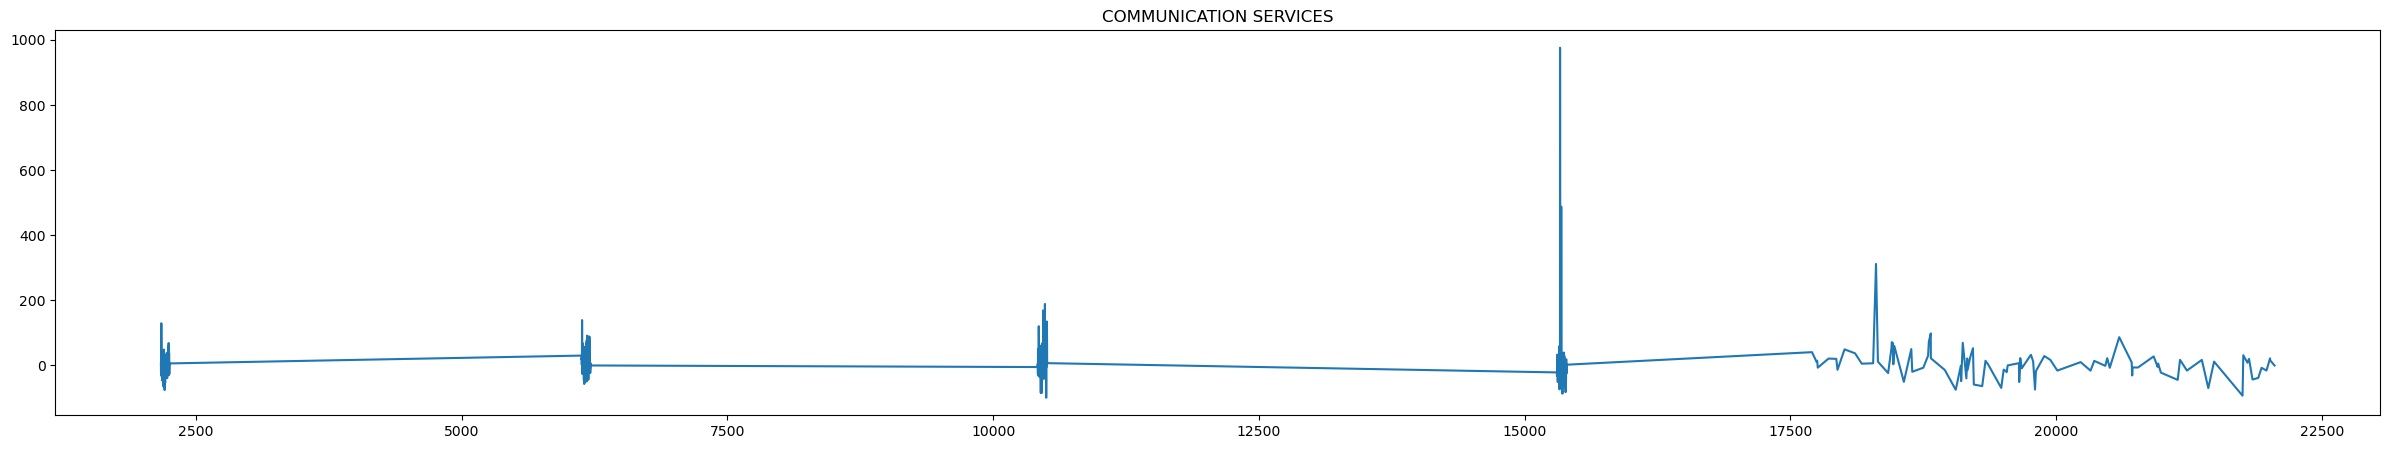

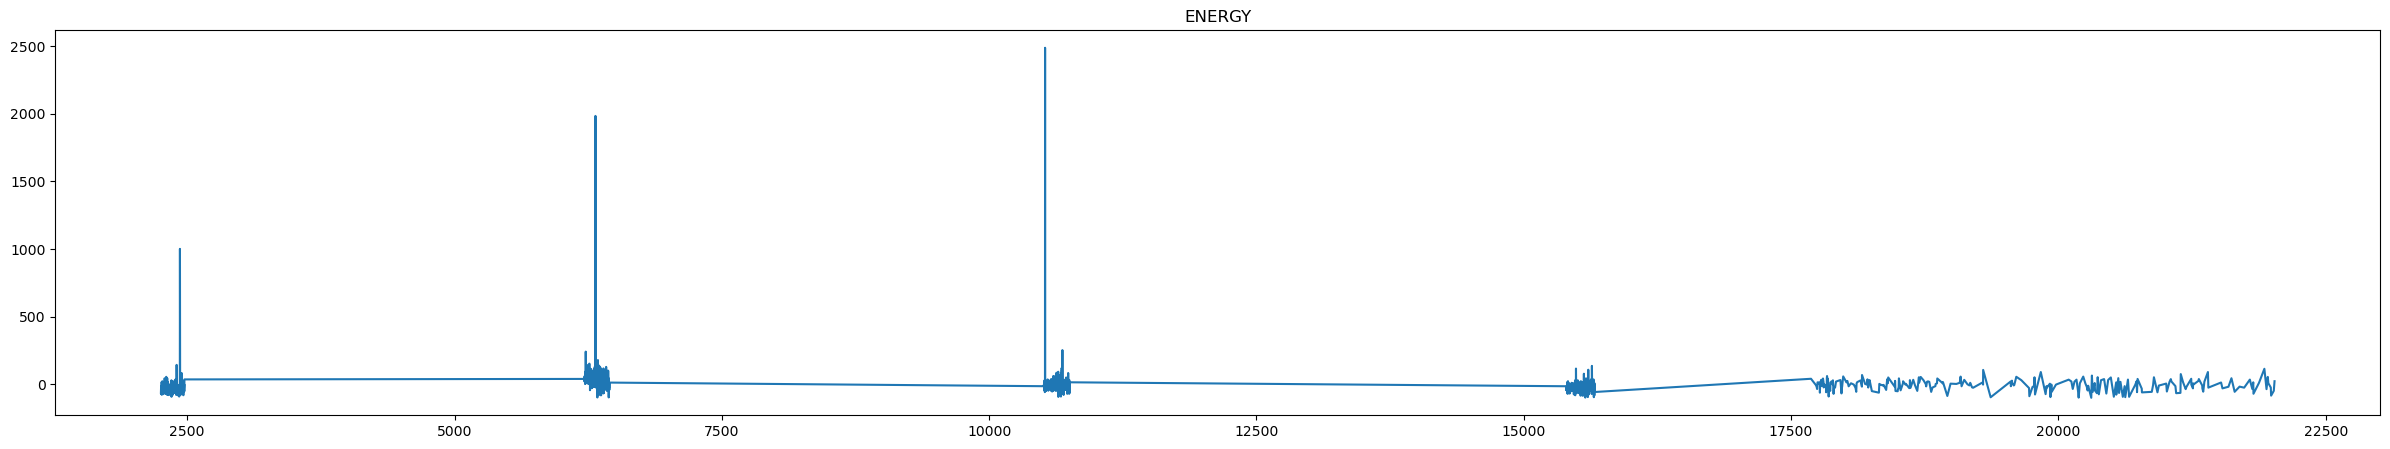

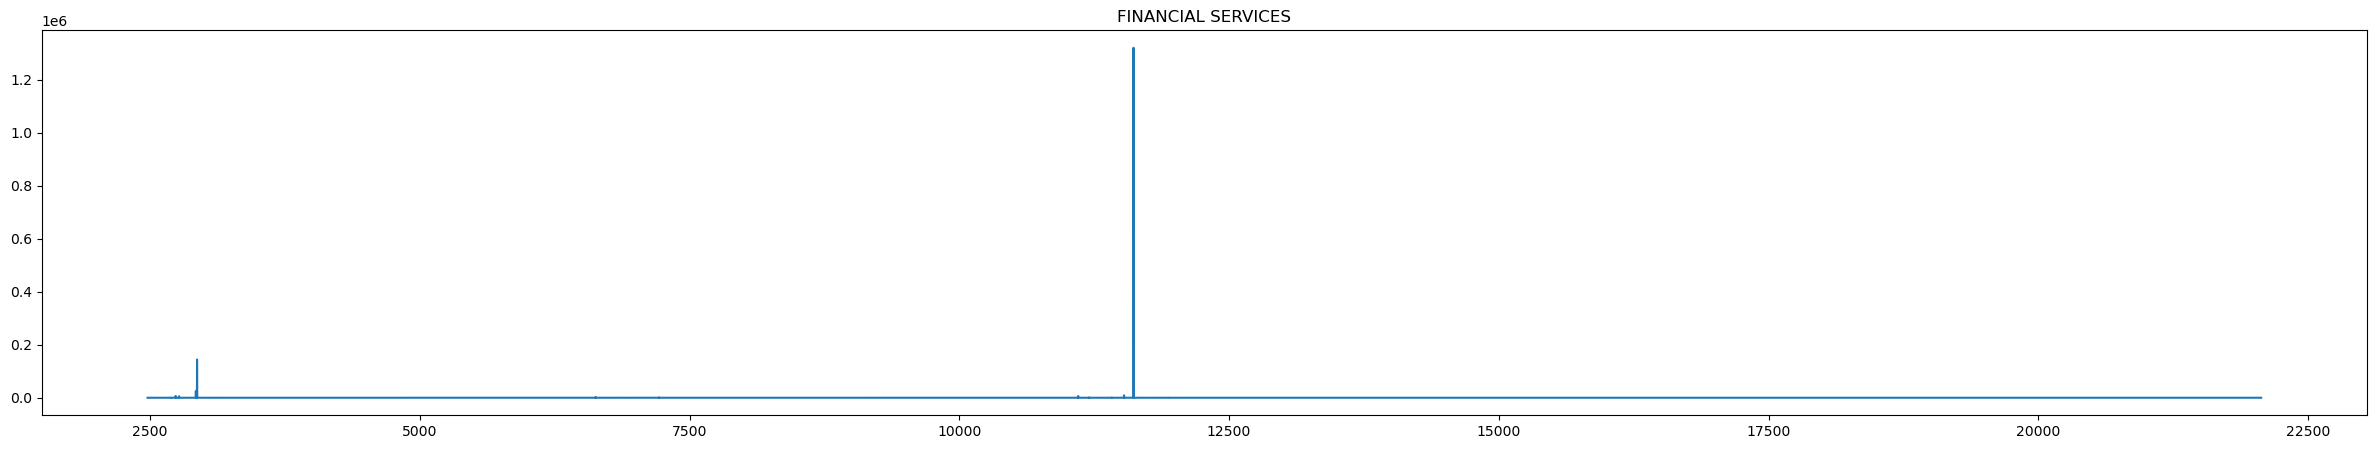

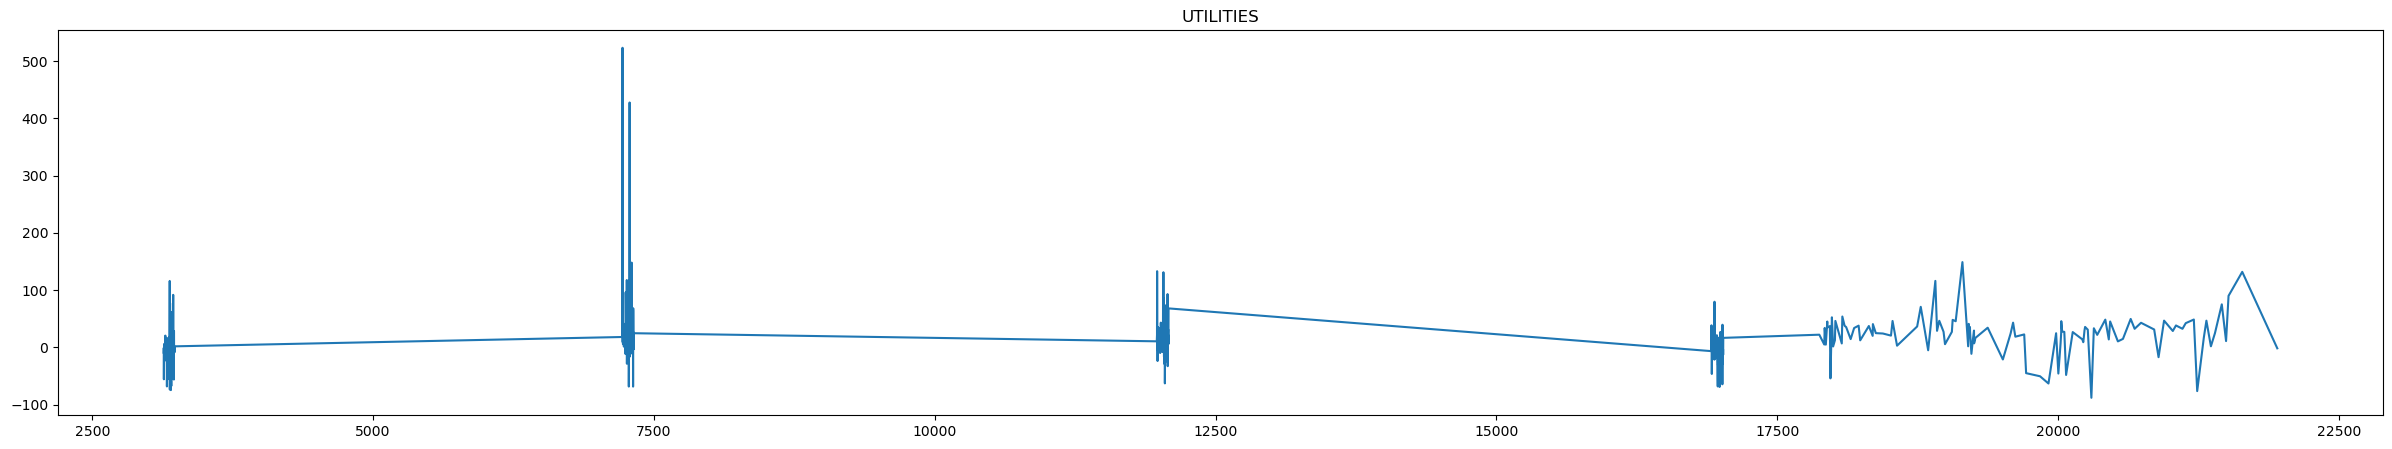

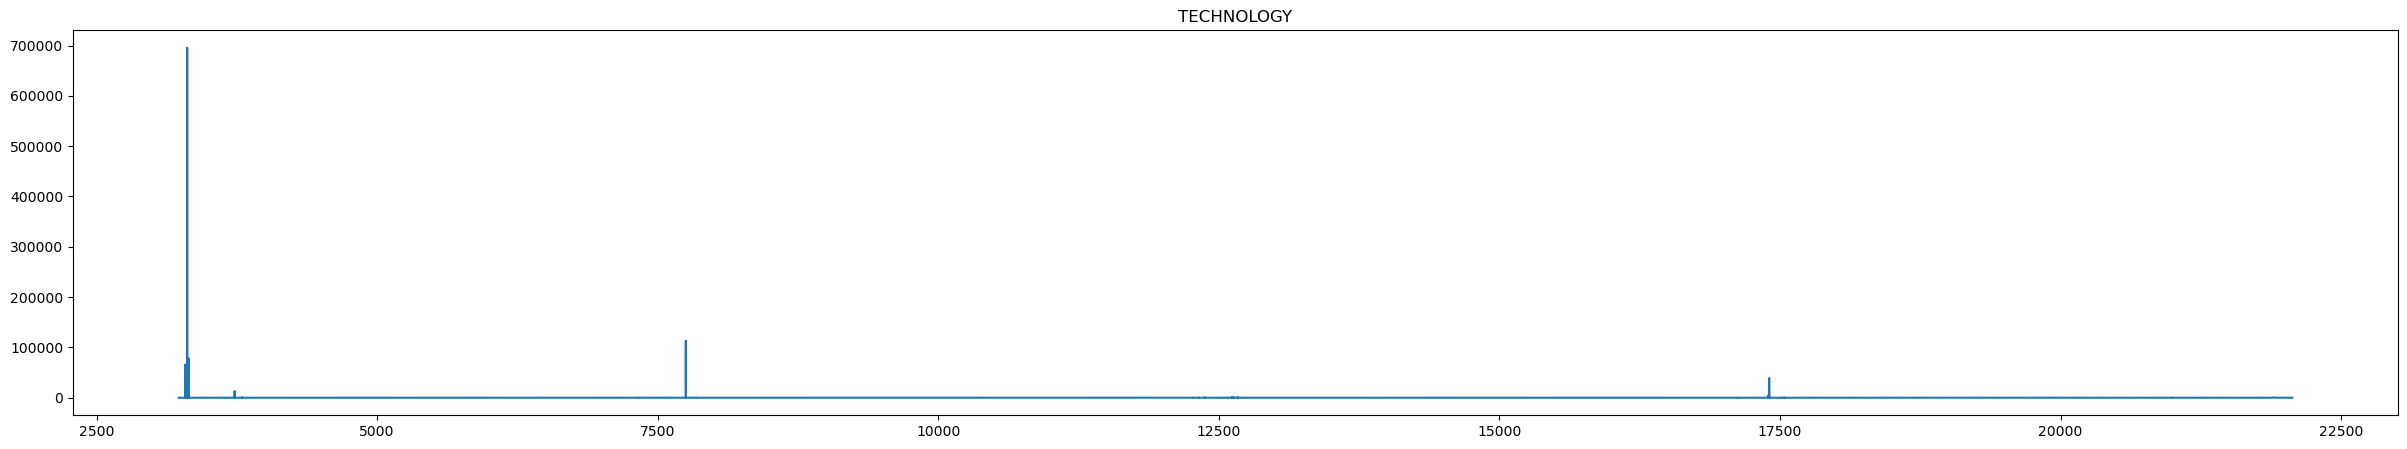

In [16]:
df_ = df.loc[:, ['Sector','PRICE VAR [%]']]

# Get list of sectors
sector_list = df_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df_[df_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['PRICE VAR [%]'])
    plt.title(sector.upper())
    plt.show()
    

### Outliers

 copy paste from here https://www.kaggle.com/code/cnic92/explore-and-clean-financial-indicators-dataset

In [ ]:
# Get stocks that increased more than 500%
gain = 500
top_gainers = df[df['PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['PRICE VAR [%]'].sort_values(ascending=False)
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()



In [ ]:
# Would be cool if that would work.........

# Set
date_start = '01-01-2015'
date_end = '12-31-2015'
tickers = top_gainers.index.values.tolist()

for ticker in tickers:
    
    # Pull daily prices for each ticker from Yahoo Finance
    daily_price = data.DataReader(ticker, 'yahoo', date_start, date_end)
    
    # Plot prices with volume
    fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
    
    ax0.plot(daily_price['Adj Close'])
    ax0.set_title(ticker, fontsize=18)
    ax0.set_ylabel('Daily Adj Close $', fontsize=14)
    ax1.plot(daily_price['Volume'])
    ax1.set_ylabel('Volume', fontsize=14)
    ax1.yaxis.set_major_formatter(
            matplotlib.ticker.StrMethodFormatter('{x:.0E}'))

    fig.align_ylabels(ax1)
    fig.tight_layout()
    plt.show()

https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

## Missing Values

There are a lot of missing values. 

In [17]:
print(f'There are in total {df.isnull().sum().sum()} NAN in the dataframe')

There are in total 484639 NAN in the dataframe


In [18]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True) do that in Outliers Section!
#df.replace(to_replace = 0, value = np.nan, inplace=true) ????? DA EVTL noch mehr mit NAN ersetzen!

Text(0.5, 1.0, 'Quantifying ALL missing data')

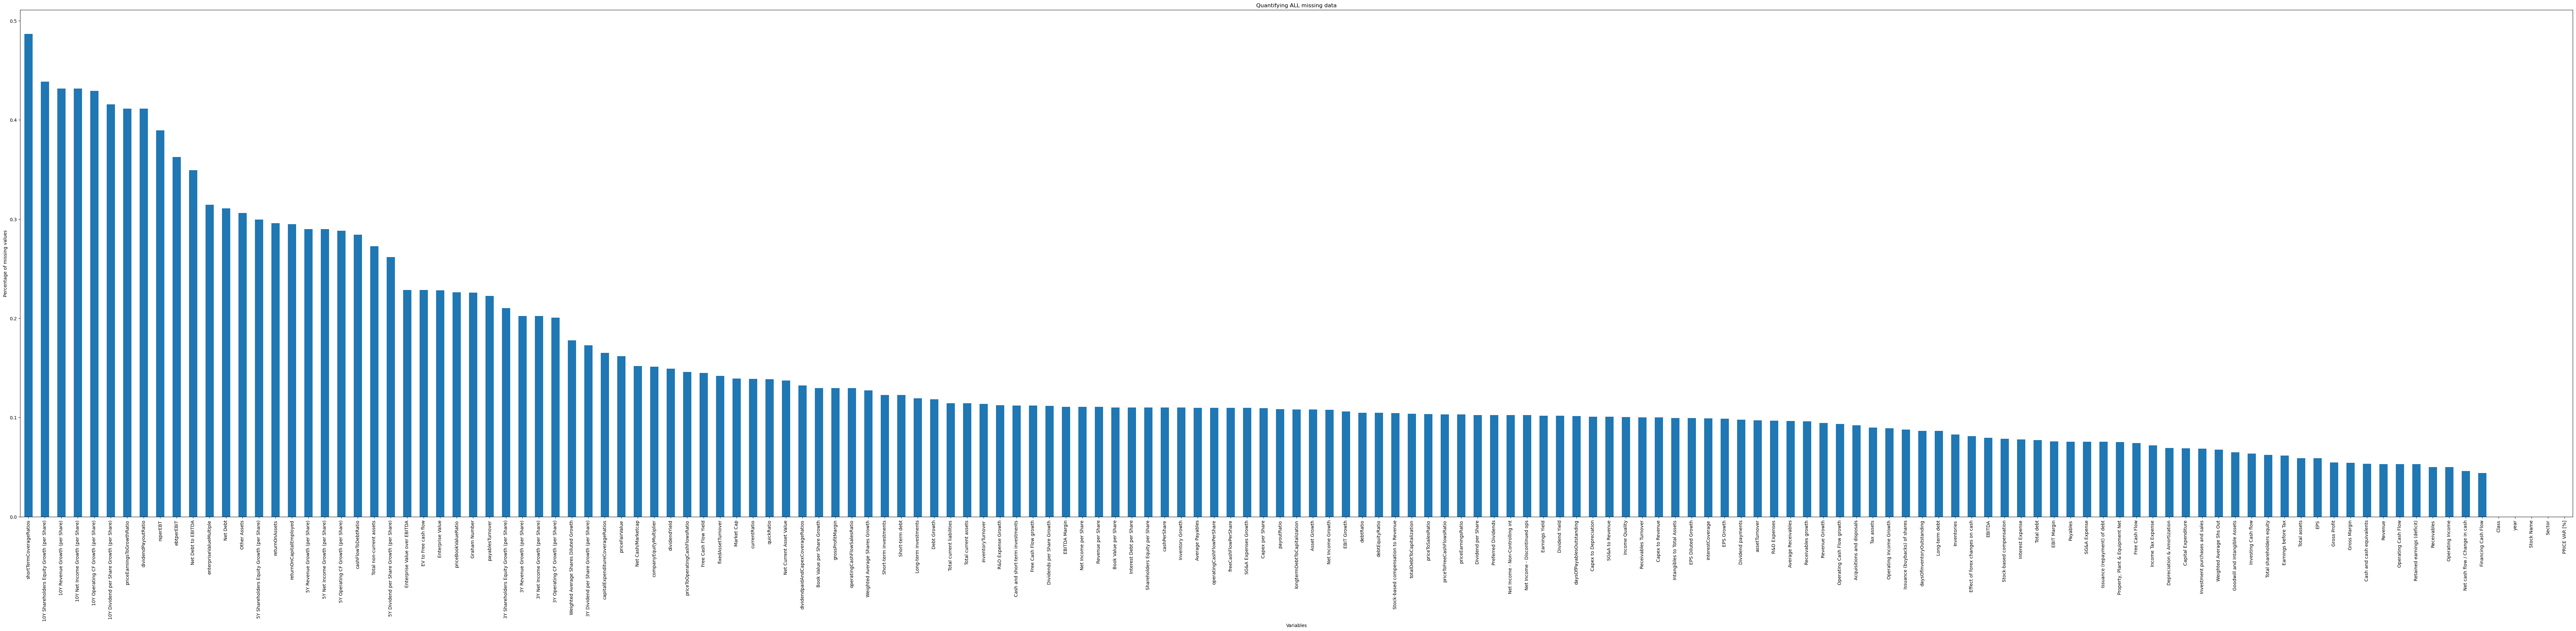

In [19]:
## Overview of all variables with missing values
df.isnull().mean().sort_values(ascending=False).plot.bar(figsize=(100,20))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying ALL missing data')


Text(0.5, 1.0, 'Data with more than 30% missing')

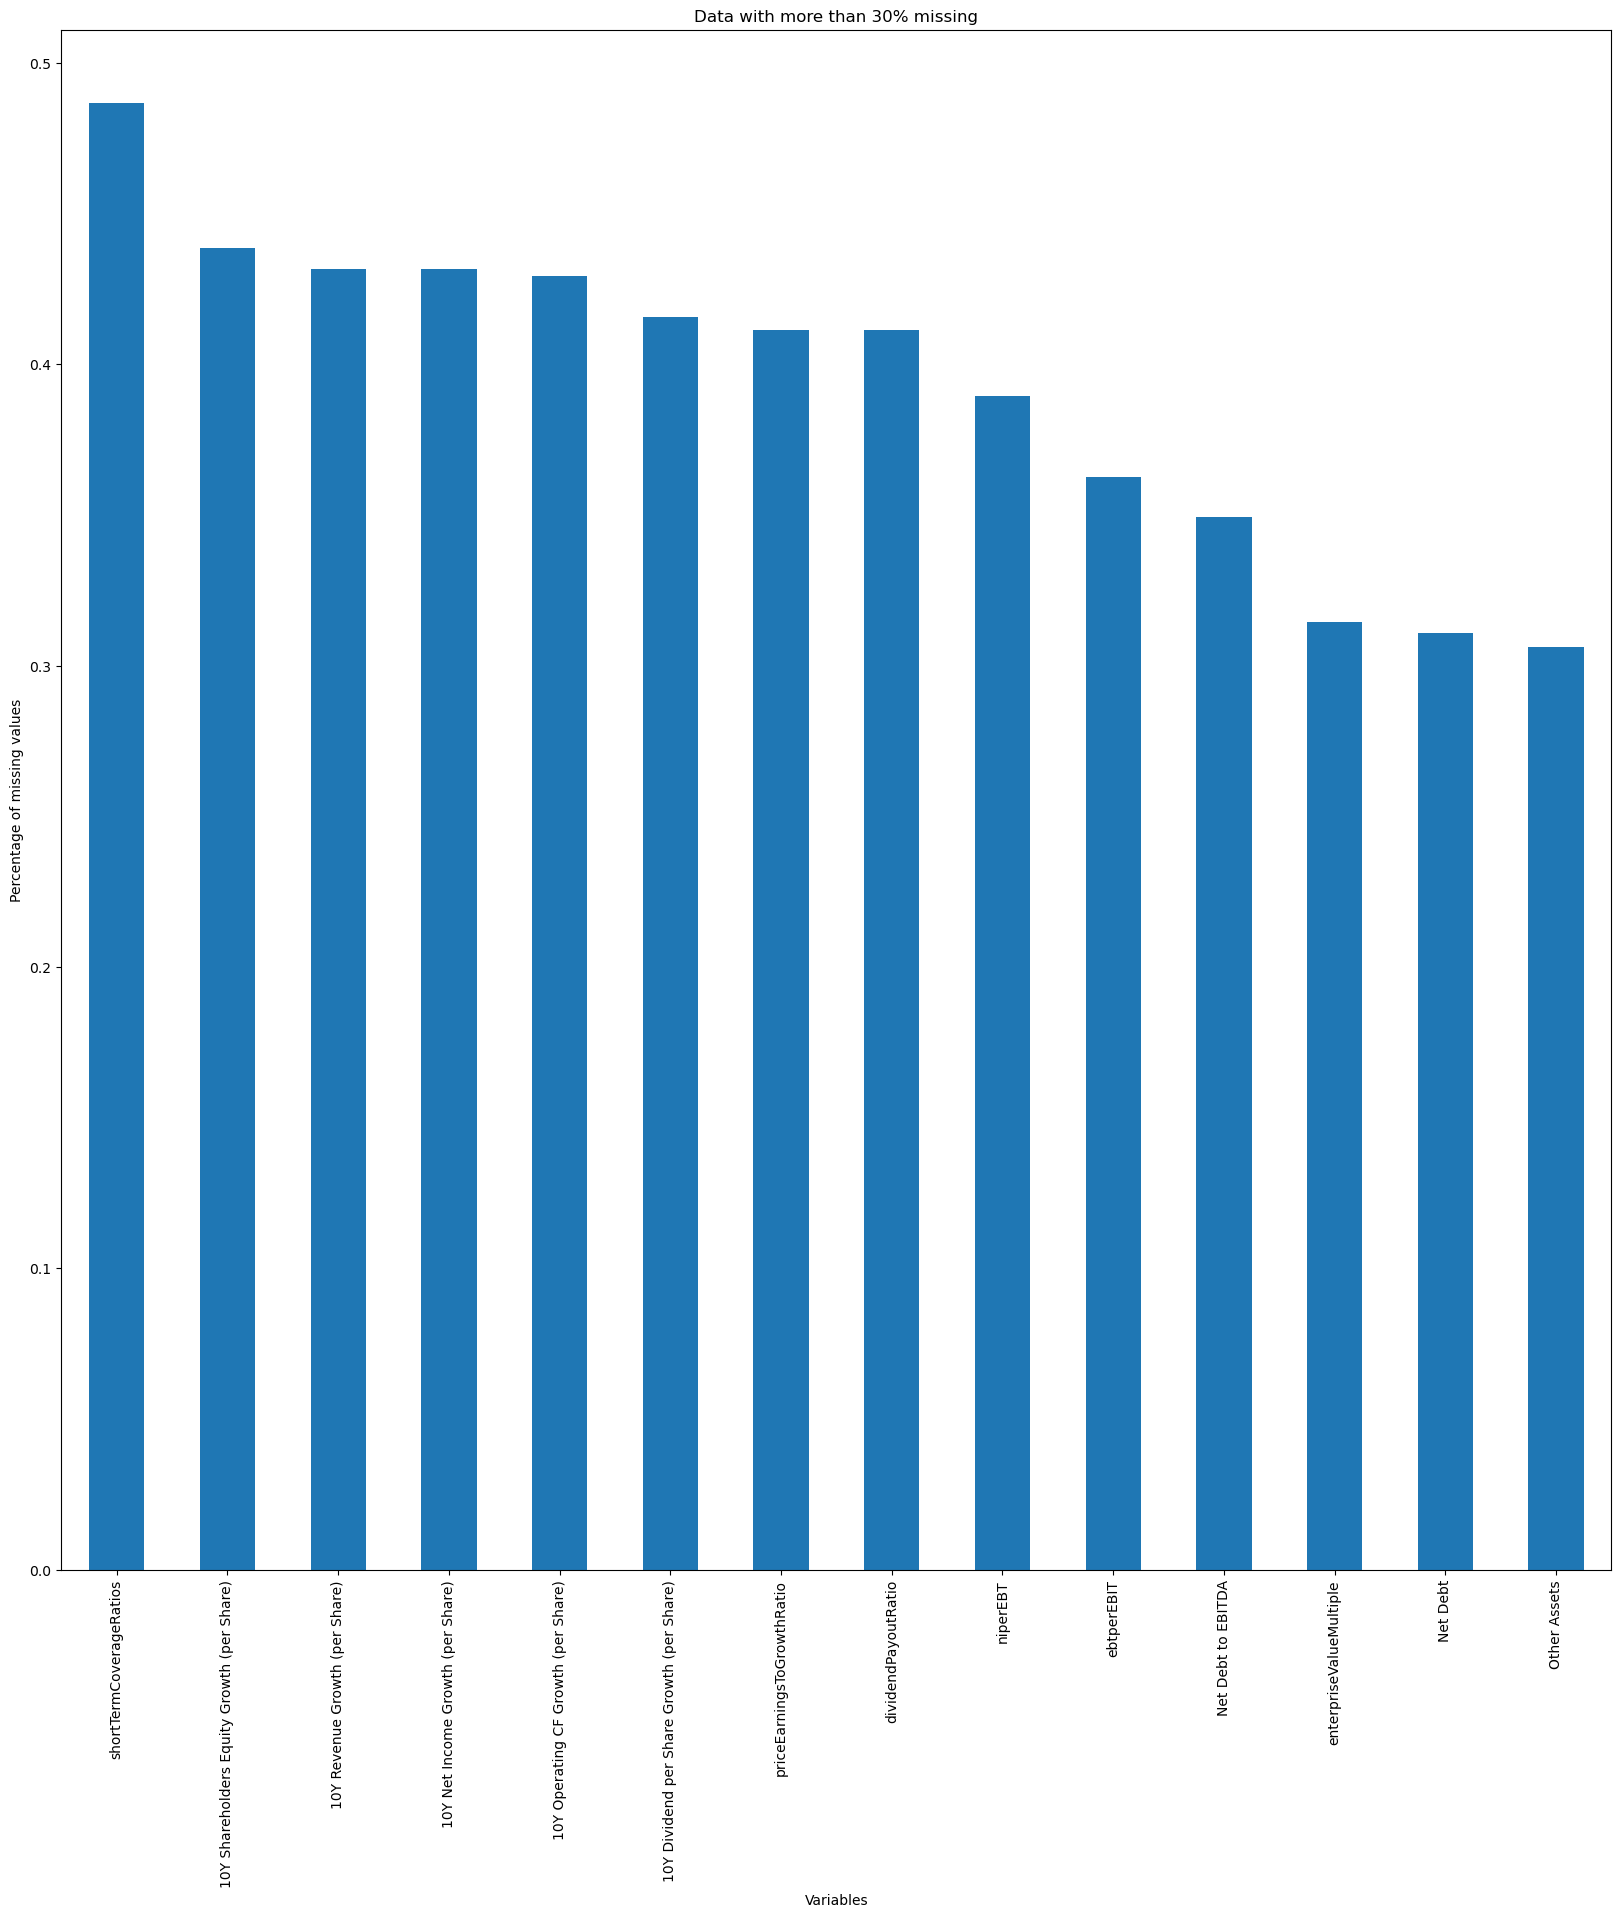

In [20]:
most_nan = df.isnull().mean().sort_values(ascending=False)
most_nan = most_nan[most_nan > 0.3]

most_nan.plot.bar(figsize=(20,20))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Data with more than 30% missing')


In [21]:
# Percentage of missing values for the variables
missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Percent of Missing Values'])
missing_data.head(25)

,Nr. of missing values,Percent of Missing Values
shortTermCoverageRatios,10744,0.486660
10Y Shareholders Equity Growth (per Share),9680,0.438465
10Y Revenue Growth (per Share),9532,0.431762
10Y Net Income Growth (per Share),9532,0.431762
10Y Operating CF Growth (per Share),9478,0.429316
10Y Dividend per Share Growth (per Share),9177,0.415681
priceEarningsToGrowthRatio,9079,0.411242
dividendPayoutRatio,9079,0.411242
niperEBT,8595,0.389319
ebtperEBIT,8007,0.362685


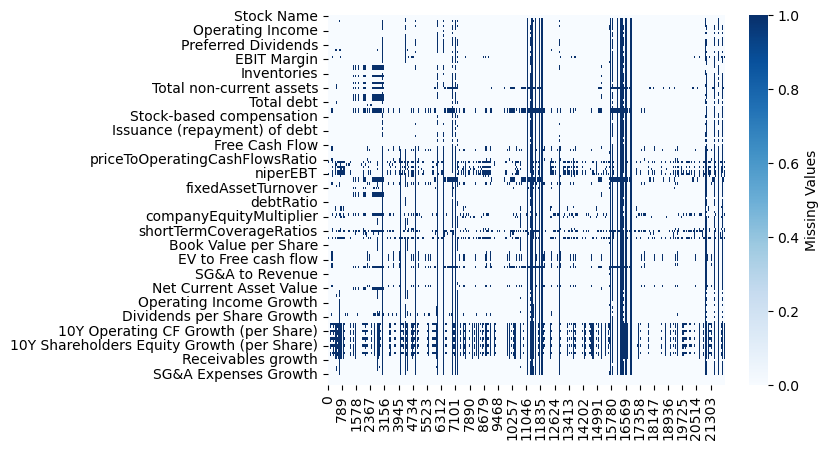

In [22]:
# Plot missing values 2.0
sns.heatmap(df.isna().transpose(), cmap="Blues", cbar_kws={'label': 'Missing Values'});

## Outliers cleaning

There are outliers/extreme values that are probably caused by mistypings. During our analysis of the data, we noticed that the values of NA and 0 were frequently used. We realized that 0 was used interchangeably with NA.  Also there are a lot of values that seem impossible. 

In [ ]:
## Z-Score: 

threshold = 3

test= df[['ebtperEBIT', 'returnOnCapitalEmployed']]
for col in test:
    z_score= stats.zscore(df[col], nan_policy='omit')
    outlier_indices = np.where(z_score > threshold)
    print(outlier_indices )
    

    

https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

In [ ]:
# IQR
test= df[['ebtperEBIT', 'returnOnCapitalEmployed']]
for col in test:
    iqr= stats.iqr(df[col], nan_policy='omit')
    print(iqr)

#''''''


## Handling Missing Data

In [15]:
#Drop all columns with nr. of NaN > 30%

print("Shape of df data:", df.shape)

ratio_of_nan = df.isnull().mean(axis = 0)
most_nan_columns = ratio_of_nan[ratio_of_nan > 0.3]

df = df.drop(columns=most_nan_columns.index.values)

print("Shape of df data after removing columns with nr. of NaN > 30%:", df.shape)

Shape of df data: (22077, 155)
Shape of df data after removing columns with nr. of NaN > 30%: (22077, 141)


In [16]:
numCols = df.select_dtypes(include=['float64', 'int64']).columns
print("New numerical columns:", numCols)
df[numCols] = df[numCols].fillna(df[numCols].median())

catCols = df.select_dtypes(exclude=np.number).columns
print("New categorical columns:", catCols)
for col in catCols:
    df[col].fillna("Unknown", inplace=True)
    
df.head()

New numerical columns: Index(['Revenue', 'Revenue Growth', 'Gross Profit', 'R&D Expenses',
       'SG&A Expense', 'Operating Income', 'Interest Expense',
       'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       ...
       '5Y Dividend per Share Growth (per Share)',
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth',
       'PRICE VAR [%]'],
      dtype='object', length=137)
New categorical columns: Index(['Stock Name', 'Sector', 'Class', 'year'], dtype='object')


,Stock Name,Revenue,Revenue Growth,Gross Profit,R&D Expenses,SG&A Expense,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,year,PRICE VAR [%]
0,PG,7.440100e+10,-0.0713,3.537100e+10,0.000000e+00,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,0,2014,-9.323276
1,VIPS,3.734148e+09,1.1737,9.285226e+08,1.083303e+08,3.441414e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,...,0.0000,0.0480,0.0324,0.0000,1.6484,1.7313,Consumer Defensive,0,2014,-25.512193
2,KR,9.837500e+10,0.0182,2.023700e+10,0.000000e+00,1.519600e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,1,2014,33.118297
3,RAD,2.552641e+10,0.0053,7.323734e+09,0.000000e+00,6.561162e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,1,2014,2.752291
4,GIS,1.790960e+10,0.0076,6.369800e+09,0.000000e+00,3.474300e+09,2.957400e+09,3.024000e+08,2.707700e+09,8.833000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,1,2014,12.897715


In [25]:
# Checking Missing data again
missing = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Nr. of missing values', 'Percent of Missing Values'])
missing_data.head(25)

,Nr. of missing values,Percent of Missing Values
Stock Name,0,0.0
Income Quality,0,0.0
Market Cap,0,0.0
Enterprise Value,0,0.0
Enterprise Value over EBITDA,0,0.0
EV to Free cash flow,0,0.0
Earnings Yield,0,0.0
Free Cash Flow Yield,0,0.0
Dividend Yield,0,0.0
Shareholders Equity per Share,0,0.0


## Adding Dummies

In [17]:
# Factorize categorical values, assign output to X


# create (multiple) dummy variables for a categorical variable
df = pd.get_dummies(df, columns=catCols.drop("Stock Name"))
df.head()

,Stock Name,Revenue,Revenue Growth,Gross Profit,R&D Expenses,SG&A Expense,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,...,Sector_Real Estate,Sector_Technology,Sector_Utilities,Class_0,Class_1,year_2014,year_2015,year_2016,year_2017,year_2018
0,PG,7.440100e+10,-0.0713,3.537100e+10,0.000000e+00,2.146100e+10,1.391000e+10,7.090000e+08,1.449400e+10,2.851000e+09,...,0,0,0,1,0,1,0,0,0,0
1,VIPS,3.734148e+09,1.1737,9.285226e+08,1.083303e+08,3.441414e+08,1.345959e+08,1.214869e+07,1.753823e+08,3.955957e+07,...,0,0,0,1,0,1,0,0,0,0
2,KR,9.837500e+10,0.0182,2.023700e+10,0.000000e+00,1.519600e+10,2.725000e+09,4.430000e+08,2.270000e+09,7.510000e+08,...,0,0,0,0,1,1,0,0,0,0
3,RAD,2.552641e+10,0.0053,7.323734e+09,0.000000e+00,6.561162e+09,7.372520e+08,4.245910e+08,2.502180e+08,8.040000e+05,...,0,0,0,0,1,1,0,0,0,0
4,GIS,1.790960e+10,0.0076,6.369800e+09,0.000000e+00,3.474300e+09,2.957400e+09,3.024000e+08,2.707700e+09,8.833000e+08,...,0,0,0,0,1,1,0,0,0,0


## Assigning X and target y

In [34]:
X = df.loc[:, df.columns != "Class"]
X = df.drop(labels=["Class_0", "Class_1", "Stock Name", "year_2014", "year_2015", "year_2016", "year_2017", "year_2018", "PRICE VAR [%]"], axis = 1)
y = df["Class_0"] 

## Train and Test Split

In [35]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42) 

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (15453, 147)
y_train shape: (15453,)
X_test shape: (6624, 147)
y_test shape: (6624,)


## Important Link

[Cleaning Data Set](https://www.kaggle.com/code/cnic92/explore-and-clean-financial-indicators-dataset)

## Neural Network

In [44]:
import torch
from torchvision import datasets as datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torchvision

from skorch import NeuralNetClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report)

import seaborn as sn

The predictor variables for the neural network include all the numerical variables and the categorial dummy variables "Sector_x". The numerical variables are standardized by the z-score standardization. The network is trained on the binary variable "Class". 

In [19]:
X = df.drop(labels=["Class_0", "Class_1", "Stock Name", "year_2014", "year_2015", "year_2016", "year_2017", "year_2018", "PRICE VAR [%]"], axis = 1)
stdCols = X.select_dtypes(include = "float64").columns #columns to be standardized
X[stdCols] = (X[stdCols]-X[stdCols].mean())/X[stdCols].std()
y = df["Class_1"]

### FCNetwork

We build a fully connected network with two hidden layers. To prevent overfitting a dropout layer follows both the hidden layers. We use the rectified linear unit function for activation. The output is transformed by the sigmoid function to find the predicted values between 0 and 1.

In [20]:
input_dim = X.shape[1]
batch_size = 4

In [21]:
class FCNetwork(nn.Module):
    def __init__(self, dropout_rate=0.3, input_dim = input_dim):
        super().__init__()
        self.lin1 = nn.Linear(input_dim, input_dim//2)
        self.lin2 = nn.Linear(input_dim//2, input_dim//4)
        self.lin3 = nn.Linear(input_dim//4, 1)
        self.drop1 = nn.Dropout(p = dropout_rate)
        self.drop2 = nn.Dropout(p = dropout_rate)
        self.prob = nn.Sigmoid()

    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = self.drop1(x)
        x = F.relu(self.lin2(x))
        x = self.drop2(x)
        x = self.lin3(x)
        x = self.prob(x)
        return x

### Grid Search for optimal Hyperparameters
To improve the accuracy of the model, the hyperparameters "learning rate", "momentum" and "dropout rate" are optimized by grid search. This is performed by the function Gridsearch which uses GridSearchCV from sklearn.model_selection and returns the optimal parameters from the grid "param_grid".


In [ ]:
#Transformation of the data to tensors for the Grid Search
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.astype("int32").values, dtype=torch.float32).reshape(-1, 1)

In [ ]:
param_grid = {"optimizer__lr": [0.001, 0.004, 0.007, 0.01], 
              "optimizer__momentum": [0.6, 0.7, 0.8, 0.9],
              "module__dropout_rate": [0.2, 0.3, 0.4, 0.5]}

In [ ]:
def GridSearch(X, y, param_grid, max_epochs, batch_size):
    #Transformation of the data to tensors for the Grid Search
    X_tensor = torch.tensor(X.values, dtype=torch.float32)
    y_tensor = torch.tensor(y.astype("int32").values, dtype=torch.float32).reshape(-1, 1)
    
    model = NeuralNetClassifier(
    FCNetwork,
    criterion=nn.BCELoss,
    optimizer=optim.SGD,
    max_epochs=max_epochs,
    batch_size=batch_size,
    verbose=False
    )
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs = -1)
    grid_result = grid.fit(X_tensor, y_tensor)
    
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
        
    return grid_result.best_params_

In [ ]:
max_epochs = 5
optimal_hyperp = GridSearch(X, y, param_grid, max_epochs, batch_size)

### Training the Neural Network with the optimal parameters
The optimal hyperparameters were found to be:
    learning rate = 0.01,
    momentum = 0.9,
    dropout rate = 0.2.
   
With these hyperparameters and a batch size of 4 the neural network is trained using pytorch. For this purpose, a class CustomDataset is created which transforms the data to torch.tensors and contains a method __get_item__(self, idx) for the data loader. The dataloader is defined in the function CustomDataloader(X, y). It splits the data set in parts for training, evaluation and testing. By using the class DataLoader from torch.utils.data it returns the data set in the appropriate data type for the FCNetwork. The training is performed by the function FCNetwork_train(network, trainloader, valloader, PATH, nr_epochs, print_running_loss) which saves the optimal network parameters in a file under PATH. The function test_true_predicted(network, testloader, PATH): returns a list of the true class labels and a list of the predicted class labels from the test set.

In [22]:
optimal_lr = 0.01 #GridSearch(X, y, param_grid, max_epochs, batch_size)["optimizer__lr"]
optimal_momentum = 0.9 #GridSearch(X, y, param_grid, max_epochs, batch_size)["optimizer__momentum"]
optimal_dropout = 0.2 #GridSearch(X, y, param_grid, max_epochs, batch_size)["module__dropout_rate"]

In [23]:
#Definition of Dataset for Dataloader
class CustomDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.astype("int32").values, dtype=torch.float32).reshape(-1, 1)
        
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [24]:
def CustomDataloader(X, y):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42) 
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state = 42)

    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    test_dataset = CustomDataset(X_test, y_test)

    trainloader = DataLoader(train_dataset, batch_size=batch_size,
                                              shuffle=True)

    valloader = DataLoader(val_dataset, batch_size=batch_size,
                                             shuffle=False)

    testloader = DataLoader(test_dataset, batch_size=batch_size,
                                             shuffle=False)
    
    return trainloader, valloader, testloader

In [25]:
def FCNetwork_train(network, trainloader, valloader, PATH, nr_epochs, print_running_loss):
    criterion = nn.BCELoss()
    optimizer = optim.SGD(network.parameters(), lr=optimal_lr, momentum=optimal_momentum)
    
    min_val_loss = float("inf")
    for epoch in range(nr_epochs):  

        running_loss = 0.0
        network.train()
        n = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data

            optimizer.zero_grad()

            outputs = network(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            n += 1

        if print_running_loss:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / n:.3f}')

        network.eval()
        val_loss = 0
        n = 0
        with torch.no_grad():
            for i, data in enumerate(valloader, 0):
                inputs, labels = data

                outputs = network(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                n += 1

        if print_running_loss:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {val_loss / n:.3f}')            

        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(network.state_dict(), PATH)
            
            if print_running_loss:   
                print(f"The new best model is at epoch {epoch}")
        
        if print_running_loss:
            print(f'Epoch: {epoch} over')

In [51]:
def test_true_predicted(network, testloader, PATH): #, print_accuracy):
    network.load_state_dict(torch.load(PATH))
    
    #correct = 0
    #total = 0
    
    y_pred = []
    y_true = []
    
    network.eval()
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = network(inputs)
            predicted = outputs>0.5 
            
            y_true.extend(torch.reshape(labels, (batch_size, )).tolist())
            y_pred.extend(torch.reshape(predicted, (batch_size, )).tolist())
            
            #total += labels.size(0)
            #correct += (predicted == labels).sum().item()
    
    #if print_accuracy:
    #print(f'Accuracy of the network on the test images: {100 * correct / total} %')
    return y_true, y_pred #correct / total, 

In [48]:
PATH = './net.pth'

In [49]:
network = FCNetwork(input_dim = input_dim, dropout_rate = optimal_dropout)
trainloader, valloader, testloader = CustomDataloader(X, y)
FCNetwork_train(network, trainloader, valloader, PATH, nr_epochs=10, print_running_loss=False)

In [52]:
y_true = test_true_predicted(network, testloader, PATH)[0]
y_pred = test_true_predicted(network, testloader, PATH)[1]

acc = accuracy_score(y_true, y_pred)

print("Full model", acc)

Full model 0.5828804347826086


<AxesSubplot:>

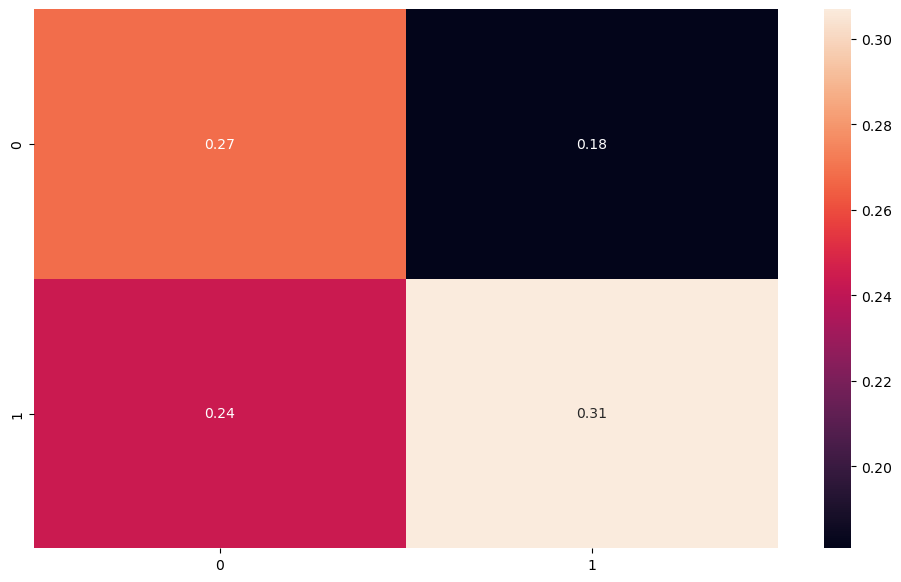

In [46]:
cf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (12,7))
sn.heatmap(cf_matrix/len(y_true), annot=True)

To analyze the significance of the different predictor variables, we train different models, omitting one of the predictor variables at a time. While the accuracy of the model trained on the full data set is approximately 0.59, the accuracy of several models trained on a reduced data set drops below 0.55.

In [ ]:
accuracy_dropped_variable = []

for column in X.columns.values:
    
    network = FCNetwork(input_dim = input_dim-1, dropout_rate = optimal_dropout)
    
    trainloader, valloader, testloader = CustomDataloader(X.drop(columns = column), y)

    FCNetwork_train(network, trainloader, valloader, PATH, nr_epochs=5, print_running_loss=False)
        
    y_true = test_true_predicted(network, testloader, PATH)[0]
    y_predicted = test_true_predicted(network, testloader, PATH)[1]

    acc = accuracy_score(y_true, y_predicted)
   
    accuracy_dropped_variable.append(acc)
    
    print(column, acc)            

In [ ]:
accuracy_dropped_variable = pd.Series(accuracy_dropped_variable, index = X.columns.values)
accuracy_dropped_variable = accuracy_dropped_variable.sort_values(axis = 0)
accuracy_dropped_variable.head(10)

In [ ]:
plt.figure(figsize = (25,10))
barplot = plt.bar(influence.index.values, influence)
xticks = plt.xticks(influence.index.values, rotation='vertical', fontsize=5)
plt.ylim((0.54, 0.6))
plt.plot([0.58 for i in range(len(accuracy_with_dropped_variable))], linestyle='dashed', color = "black")
plt.ylabel("accuracy")
plt.xlabel("name of dropped variable")

In [ ]:
most_influencial_variables = accuracy_dropped_variable[accuracy_dropped_variable < 0.58].index.values

## Testing Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report)

In [36]:
# Selecting most significant features

# Feature selection using Extra Trees Classifier on the resampled training data
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_

# Select top features with highest importance scores
top_features = pd.Series(importances, index=X_train.columns).nlargest(300)

# Subset X_resampled and X_test with selected features
X_train_selected = X_train[top_features.index]
X_test_selected = X_test[top_features.index]

In [37]:
# Random Forest Classifier with the best hyperparameters found
rf_best = RandomForestClassifier(
    n_estimators=1670,
    criterion='gini',
    max_depth=18,
    min_samples_split=3,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

# Train the Random Forest model with the best hyperparameters
rf_best.fit(X_train_selected, y_train)

# Predict the test set
y_pred_rf = rf_best.predict(X_test_selected)

# Model evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='macro')
rec_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
print("Random Forest Classifier: Accuracy = %.3f, Precision = %.3f, Recall = %.3f, F1 Score = %.3f" % (acc_rf, prec_rf, rec_rf, f1_rf))

Random Forest Classifier: Accuracy = 0.622, Precision = 0.616, Recall = 0.613, F1 Score = 0.613


In [38]:
print(y_test)
print(y_pred_rf)

2675     0
12820    1
17962    0
18588    0
9815     0
        ..
15483    1
7491     1
13398    1
15512    1
6254     0
Name: Class_0, Length: 6624, dtype: uint8
[0 0 0 ... 1 1 0]


## Test SVM

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

# Create StandardScaler object
sc = StandardScaler()

# Standardize features; equal results as if done in two
X_train_std = sc.fit_transform(X_train_selected)
X_test_std = sc.transform(X_test_selected)

In [40]:
# Grid Search for getting optimal C and gamma
gamma_range = np.outer(np.logspace(-3, 0, 4),np.array([1,5]))
gamma_range = gamma_range.flatten()
print(gamma_range)

C_range = np.outer(np.logspace(-1, 1, 3),np.array([1,5]))
C_range = C_range.flatten()
print(C_range)

parameters = {'kernel':['linear', 'rbf'], 'C':C_range, 'gamma': gamma_range}

svm = SVC()
grid = RandomizedSearchCV(estimator=svm, param_distributions=parameters, n_iter=5, n_jobs=-1, verbose=2)
grid.fit(X_train_std, y_train)

print('Best CV accuracy: {:.2f}'.format(grid.best_score_))
print('Test score:       {:.2f}'.format(grid.score(X_test_std, y_test)))
print('Best parameters: {}'.format(grid.best_params_))

[1.e-03 5.e-03 1.e-02 5.e-02 1.e-01 5.e-01 1.e+00 5.e+00]
[ 0.1  0.5  1.   5.  10.  50. ]
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:  8.8min remaining:   46.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.3min finished


Best CV accuracy: 0.59
Test score:       0.60
Best parameters: {'kernel': 'rbf', 'gamma': 0.05, 'C': 1.0}
